## Dimensionality Reduction

In [ ]:
# Importing Libraries
!pip install --upgrade pip
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mental Health in Tech (full dataset)
https://osmi.typeform.com/report/Ao6BTw/U76z

We can use "Sought Treatment" as a binary Y values, which we are trying to predict based on X features. We can run a parallel analysis using "Current Mental Disorder" as another Y value which is multiclass. This variable is either "Yes", "No", or "Maybe".

Here are the survey questions: 
- Have you ever sought treatment for a mental health issue from a mental health professional? +1
- Do you currently have a mental health disorder?


**Need to be careful using the following questions as X feature variables:**
- Have you had a mental health disorder in the past? 
    - It is very likely that a person will continue to have a mental health disorder -> may bias model

- Have you been diagnosed with a mental health condition by a medical professional?
    -  how does this compare to a person's belief that they have a condition?

# Dimensionality Reduction: Sought Treatment 

### Sought treatment is the labels on our plot in the end. It will dimensionally reduce into 2 dimensions.
#### This model will reduce all the features available in the original dataset that have been cleaned and transformed to dummy variables (except for sought treatment).


In [ ]:
df_dummies_current = pd.read_csv("mental_health_tech_dummies_current.csv", index_col=0)
df_dummies_current.head()

,Tech/No Tech,Observed Negative Impact,Previous Employers,Professional Diagnosis,Sought Treatment,Condition_Addictive Disorder,"Condition_Anxiety Disorder (Generalized, Social, Phobia, etc)","Condition_Anxiety Disorder (Generalized, Social, Phobia, etc)|Asperges","Condition_Anxiety Disorder (Generalized, Social, Phobia, etc)|Attention Deficit Hyperactivity Disorder","Condition_Anxiety Disorder (Generalized, Social, Phobia, etc)|Attention Deficit Hyperactivity Disorder|Obsessive-Compulsive Disorder",...,Telling Supervisors_Maybe,Telling Supervisors_No,Telling Supervisors_Yes,MH PH Equal_I don't know,MH PH Equal_No,MH PH Equal_Yes,Prev MH Resources_None did,Prev MH Resources_Some did,"Prev MH Resources_Yes, they all did",Self Employed_0
0,1,0,1,Yes,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
1,1,0,1,Yes,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
2,1,0,1,No,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
4,0,0,1,Yes,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
5,1,1,1,No,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1


In [ ]:
Y = np.array(df_dummies_current['Sought Treatment'])
Y

In [ ]:
x_vars = df_dummies_current.drop(columns=['Sought Treatment'])
print(x_vars.shape)
x_vars.head()

(1143, 338)


,Tech/No Tech,Observed Negative Impact,Previous Employers,Professional Diagnosis,Condition_Addictive Disorder,"Condition_Anxiety Disorder (Generalized, Social, Phobia, etc)","Condition_Anxiety Disorder (Generalized, Social, Phobia, etc)|Asperges","Condition_Anxiety Disorder (Generalized, Social, Phobia, etc)|Attention Deficit Hyperactivity Disorder","Condition_Anxiety Disorder (Generalized, Social, Phobia, etc)|Attention Deficit Hyperactivity Disorder|Obsessive-Compulsive Disorder","Condition_Anxiety Disorder (Generalized, Social, Phobia, etc)|Attention Deficit Hyperactivity Disorder|Post-traumatic Stress Disorder",...,Telling Supervisors_Maybe,Telling Supervisors_No,Telling Supervisors_Yes,MH PH Equal_I don't know,MH PH Equal_No,MH PH Equal_Yes,Prev MH Resources_None did,Prev MH Resources_Some did,"Prev MH Resources_Yes, they all did",Self Employed_0
0,1,0,1,Yes,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
1,1,0,1,Yes,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
2,1,0,1,No,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
4,0,0,1,Yes,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
5,1,1,1,No,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1


In [ ]:
# transform to dictionary
dict_df = x_vars.to_dict('records')

from sklearn.feature_extraction import DictVectorizer

# transform to vector
v = DictVectorizer(sparse=False)
X = v.fit_transform(dict_df)

from sklearn.manifold import TSNE


# Lets dim reduce the 300-something dimension vectors to 2 dimensions to vizualise the dataset 
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(X)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1143 samples in 0.029s...
[t-SNE] Computed neighbors for 1143 samples in 0.861s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1143
[t-SNE] Computed conditional probabilities for sample 1143 / 1143
[t-SNE] Mean sigma: 1.686473
[t-SNE] Computed conditional probabilities in 0.079s
[t-SNE] Iteration 50: error = 66.5372391, gradient norm = 0.2296783 (50 iterations in 0.427s)
[t-SNE] Iteration 100: error = 66.7276535, gradient norm = 0.2238026 (50 iterations in 0.538s)
[t-SNE] Iteration 150: error = 67.0178375, gradient norm = 0.2075315 (50 iterations in 0.511s)
[t-SNE] Iteration 200: error = 66.8032074, gradient norm = 0.2083049 (50 iterations in 0.605s)
[t-SNE] Iteration 250: error = 66.6930847, gradient norm = 0.2105733 (50 iterations in 0.613s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.693085
[t-SNE] Iteration 300: error = 1.9886464, gradient norm = 0.0014885 (50 iterations in 0.561s

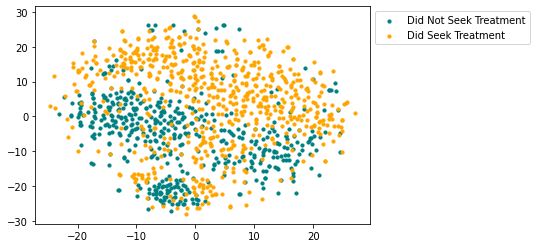

In [ ]:
df_embed = pd.DataFrame(data_embed)
df_embed['Y'] = Y

no_treatment = df_embed[df_embed['Y'] == 0]
x_axis_no = no_treatment[0]
y_axis_no = no_treatment[1]

yes_treatment = df_embed[df_embed['Y'] == 1]
x_axis_yes = yes_treatment[0]
y_axis_yes = yes_treatment[1]


plt.scatter(x_axis_no, y_axis_no, color='teal', label="Did Not Seek Treatment", s=10)
plt.scatter(x_axis_yes, y_axis_yes, color='orange', label="Did Seek Treatment", s=10)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


# Dimensionality Reduction 2
### will be looking at the representation of all features that are not confounding to predict sought treatment
#### This model will reduce all the non-confounding features available in the original dataset that have been cleaned and transformed to dummy variables (except for sought treatment).

##### Confounding variables:
- current mental disorder
- professional diagnosis
- diagnosis

In [ ]:
df_dummies = pd.read_csv("mental_health_tech_dummies.csv", index_col=0)
df_dummies.head()

In [ ]:
Y = np.array(df_dummies['Sought Treatment'])
Y

In [ ]:
x_vars = df_dummies.drop(columns=['Sought Treatment'])
print(x_vars.shape)
x_vars.head()

(1143, 142)


,Tech/No Tech,Observed Negative Impact,Previous Employers,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,...,Telling Supervisors_Maybe,Telling Supervisors_No,Telling Supervisors_Yes,MH PH Equal_I don't know,MH PH Equal_No,MH PH Equal_Yes,Prev MH Resources_None did,Prev MH Resources_Some did,"Prev MH Resources_Yes, they all did",Self Employed_0
0,1,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
1,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
2,1,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
4,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
5,1,1,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1


In [ ]:
# transform to dictionary
dict_df = x_vars.to_dict('records')

from sklearn.feature_extraction import DictVectorizer

# transform to vector
v = DictVectorizer(sparse=False)
X = v.fit_transform(dict_df)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [ ]:
from sklearn.manifold import TSNE

# Lets dim reduce the 300-something dimension vectors to 2 dimensions to vizualise the dataset 
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut', random_state=42).fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1143 samples in 0.012s...
[t-SNE] Computed neighbors for 1143 samples in 0.380s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1143
[t-SNE] Computed conditional probabilities for sample 1143 / 1143
[t-SNE] Mean sigma: 1.626948
[t-SNE] Computed conditional probabilities in 0.082s
[t-SNE] Iteration 50: error = 67.3106384, gradient norm = 0.2033457 (50 iterations in 0.425s)
[t-SNE] Iteration 100: error = 67.2250977, gradient norm = 0.2040092 (50 iterations in 0.479s)
[t-SNE] Iteration 150: error = 66.8338852, gradient norm = 0.2187843 (50 iterations in 0.451s)
[t-SNE] Iteration 200: error = 66.9024124, gradient norm = 0.2140090 (50 iterations in 0.570s)
[t-SNE] Iteration 250: error = 67.4219742, gradient norm = 0.2153992 (50 iterations in 0.500s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.421974
[t-SNE] Iteration 300: error = 1.9158320, gradient norm = 0.0016513 (50 iterations in 0.400s

In [ ]:
df_embed = pd.DataFrame(data_embed)
df_embed['Y'] = Y

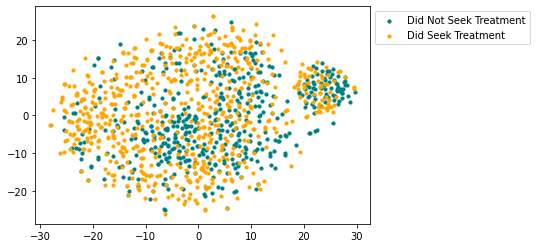

In [ ]:
no_treatment = df_embed[df_embed['Y'] == 0]
x_axis_no = no_treatment[0]
y_axis_no = no_treatment[1]

yes_treatment = df_embed[df_embed['Y'] == 1]
x_axis_yes = yes_treatment[0]
y_axis_yes = yes_treatment[1]


plt.scatter(x_axis_no, y_axis_no, color='teal', label="Did Not Seek Treatment", s=10)
plt.scatter(x_axis_yes, y_axis_yes, color='orange', label="Did Seek Treatment", s=10)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Checking if having labels based on clustering is important/demonstrates any patterns

<AxesSubplot:xlabel='cluster'>

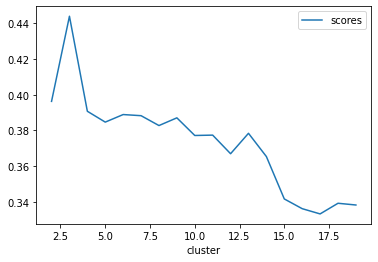

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

lst_scores = []

for i in np.arange(2, 20):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(data_embed)

  score = silhouette_score(data_embed, kmeans.labels_)
  lst_scores.append(score)

data_to_plot = pd.DataFrame({'cluster':np.arange(2, 20), "scores": lst_scores})
data_to_plot.plot("cluster", "scores")

In [ ]:
df_embed_updated = df_embed.rename(columns={0:'x', 1:'y', "Y": "Sought Treatment"})
df_embed_updated

,x,y,Sought Treatment
0,6.482466,10.454259,0
1,20.345623,6.056074,1
2,5.841616,-9.402370,1
3,-11.415899,-9.375464,1
4,8.524014,18.360920,1
...,...,...,...
1138,7.197292,-5.878716,1
1139,25.316887,-1.497995,1
1140,-9.561524,-4.954074,1
1141,7.031109,-4.316518,0


In [ ]:
cluster_size = 13
kmeans = KMeans(n_clusters=cluster_size, random_state=42)
kmeans.fit(data_embed)

df_embed_updated['labels'] = kmeans.labels_
df_embed_updated

,x,y,Sought Treatment,labels
0,6.482466,10.454259,0,0
1,20.345623,6.056074,1,3
2,5.841616,-9.402370,1,9
3,-11.415899,-9.375464,1,1
4,8.524014,18.360920,1,7
...,...,...,...,...
1138,7.197292,-5.878716,1,5
1139,25.316887,-1.497995,1,3
1140,-9.561524,-4.954074,1,1
1141,7.031109,-4.316518,0,5


In [ ]:
df_embed_updated.to_csv('dimension_mh_updated.tsv', sep='\t', index=False)


# Dimensionality Reduction: Key Features
Using only the features represented in our model

In [ ]:
# Load data
# This data set does not contain potential confounding variables such as "Current Mental Disorder"
df = pd.read_csv("mental_health_tech.csv", index_col=0).drop(columns=["Self Employed"])
df.head()

,Total Employees,Tech/No Tech,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,PH Negative Impact,...,Sharing w/ Family/Friends,Prev Observed Unsupportive Response,Less Likely to Reveal,MH Family History,Sought Treatment,Age,Gender,Country,State,Remote
0,3,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,...,Somewhat open,No,NaN,No,0,4,1.0,2,0,Sometimes
1,2,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,Somewhat open,No,NaN,Yes,1,3,1.0,1,2,Never
2,2,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,Somewhat open,Maybe/Not sure,Yes,No,1,4,1.0,2,0,Always
4,2,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Somewhat open,"Yes, I experienced",Yes,Yes,1,4,2.0,1,2,Sometimes
5,6,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,Somewhat open,"Yes, I experienced",No,No,1,4,1.0,2,0,Sometimes


In [ ]:
# demo_x_vars = demo_dummy
key_columns = ['Age', 'Gender', 'MH Family History', 'Prev Awareness of Company MH Care', "Remote", "Country", "State", "Tech/No Tech", "Total Employees", "MH Benefits", "MH Resources", "Medical Leave"]

demographic_independent_2 = df[key_columns]
demo_x_vars = pd.get_dummies(demographic_independent_2, columns=list(demographic_independent_2.columns))
demo_x_vars

# transform to dictionary
demo_dict_df = demo_x_vars.to_dict('records')

# transform to vector
v = DictVectorizer(sparse=False)
demo_X = v.fit_transform(demo_dict_df)
demo_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [ ]:
print(demo_x_vars.shape)


(1143, 51)


In [ ]:
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut', random_state=42).fit_transform(demo_X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1143 samples in 0.005s...
[t-SNE] Computed neighbors for 1143 samples in 0.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1143
[t-SNE] Computed conditional probabilities for sample 1143 / 1143
[t-SNE] Mean sigma: 1.145520
[t-SNE] Computed conditional probabilities in 0.077s
[t-SNE] Iteration 50: error = 66.0517731, gradient norm = 0.1517434 (50 iterations in 0.511s)
[t-SNE] Iteration 100: error = 66.0723419, gradient norm = 0.1571067 (50 iterations in 0.635s)
[t-SNE] Iteration 150: error = 66.0618362, gradient norm = 0.1542367 (50 iterations in 0.595s)
[t-SNE] Iteration 200: error = 66.0679932, gradient norm = 0.1621535 (50 iterations in 0.561s)
[t-SNE] Iteration 250: error = 66.0782394, gradient norm = 0.1562257 (50 iterations in 0.608s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.078239
[t-SNE] Iteration 300: error = 1.7759602, gradient norm = 0.0013440 (50 iterations in 0.542s

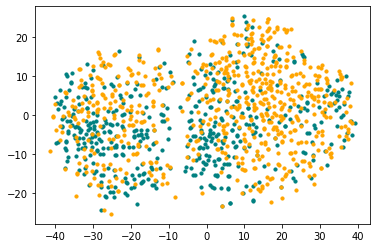

In [ ]:
df_embed = pd.DataFrame(data_embed)
df_embed['Y'] = Y

no_treatment = df_embed[df_embed['Y'] == 0]
x_axis_no = no_treatment[0]
y_axis_no = no_treatment[1]

yes_treatment = df_embed[df_embed['Y'] == 1]
x_axis_yes = yes_treatment[0]
y_axis_yes = yes_treatment[1]


plt.scatter(x_axis_no, y_axis_no, color='teal', label="Did Not Seek Treatment", s=10)
plt.scatter(x_axis_yes, y_axis_yes, color='orange', label="Did Seek Treatment", s=10)
# plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<AxesSubplot:xlabel='cluster'>

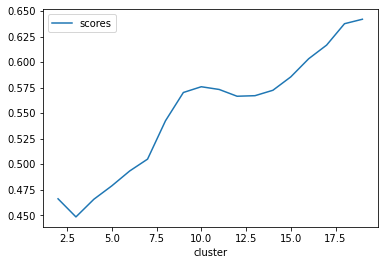

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

lst_scores = []

for i in np.arange(2, 20):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(data_embed)

  score = silhouette_score(data_embed, kmeans.labels_)
  lst_scores.append(score)

data_to_plot = pd.DataFrame({'cluster':np.arange(2, 20), "scores": lst_scores})
data_to_plot.plot("cluster", "scores")

In [ ]:
df_embed = pd.DataFrame(data_embed)
df_embed['Y'] = Y
df_embed_updated = df_embed.rename(columns={0:'x', 1:'y', "Y": "Sought Treatment"})
df_embed_updated

,x,y,Sought Treatment
0,14.339795,-22.371807,0
1,-0.192742,29.016813,1
2,13.702026,-23.572136,1
3,-1.667184,5.395564,1
4,7.994085,-21.670790,1
...,...,...,...
1138,3.955722,-4.441136,1
1139,-1.766969,1.259089,1
1140,2.174253,20.618494,1
1141,-12.609158,4.244698,0


In [ ]:
cluster_size = 8
kmeans = KMeans(n_clusters=cluster_size, random_state=42)
kmeans.fit(data_embed)

df_embed_updated['labels'] = kmeans.labels_
df_embed_updated

,x,y,Sought Treatment,labels
0,14.339795,-22.371807,0,7
1,-0.192742,29.016813,1,0
2,13.702026,-23.572136,1,7
3,-1.667184,5.395564,1,2
4,7.994085,-21.670790,1,7
...,...,...,...,...
1138,3.955722,-4.441136,1,5
1139,-1.766969,1.259089,1,2
1140,2.174253,20.618494,1,0
1141,-12.609158,4.244698,0,2


In [ ]:
df_embed_updated.to_csv('dimension_mh_v2.tsv', sep='\t', index=False)

**Dimensionality reduction: Predicting Current Mental Disorder**

In [ ]:
# Y = df_dummies[['Current Mental Disorder_Maybe', 'Current Mental Disorder_No', 'Current Mental Disorder_Yes']]
# x = df_dummies.drop(columns=['Current Mental Disorder_Maybe', 'Current Mental Disorder_No', 'Current Mental Disorder_Yes'])
# print(x.shape)
# x.head()

In [ ]:
# x_dict_df = x.to_dict('records')
# v = DictVectorizer(sparse=False)
# X = v.fit_transform(x_dict_df)
# X

In [ ]:
# data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(X)
# x_axis= data_embed[:,0]
# y_axis=data_embed[:,1]

# plt.scatter(x_axis, y_axis, s=5)
# plt.show()

In [ ]:
# # dict_cmd = {"Yes": "yellow", "No": "blue", "Maybe": "green"}
# dict_cmd = {"Yes": 1, "No": 0, "Maybe": 0.5}
# Y_cat = np.array(df[['Current Mental Disorder']].replace({"Current Mental Disorder": dict_cmd})['Current Mental Disorder'])
# Y_cat

In [ ]:
# embeded_df = pd.DataFrame(v.inverse_transform(data_embed))
# embeded_df['Y'] = Y_cat
# embeded_df.plot.scatter(x="Age_1", y="Age_2", c="Y", colormap='viridis')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=387b3f34-ad6b-4fed-8016-3e4e46161261' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>